In [1]:
import numpy as np ; import re
from matplotlib import pyplot;
import matplotlib.pyplot as plt ; import matplotlib.image as mpimg ;
from matplotlib.pyplot import imshow, plot, figure
import PIL; from PIL import *; from PIL import Image, ImageFilter
import tesserocr; from tesserocr import PyTessBaseAPI
import cv2;
%matplotlib inline

In [2]:
image_petrol = Image.open("../data-test/petrol.jpg")
image_omv = Image.open("../data-test/omv.jpg")
image_omv_small = Image.open("../data-test/omv-small.jpg")
image_omv_three = Image.open("../data-test/omv-three.jpg")

- [OpenCV 3 - Image Thresholding](http://docs.opencv.org/3.1.0/d7/d4d/tutorial_py_thresholding.html)
- [OpenCV2 before Tesseract](http://stackoverflow.com/questions/32473095/image-to-text-recognition-using-tesseract-ocr-is-better-when-image-is-preprocess)

In [3]:
# imshow(np.asarray(image_petrol)) ;

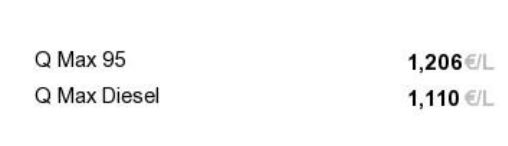

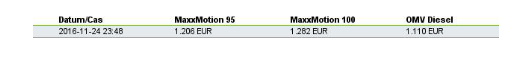

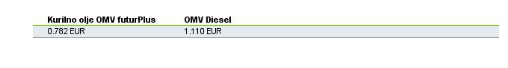

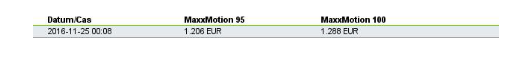

In [4]:
plt.axis("off") ; plt.figure(1) ; plt.imshow(image_petrol) ; plt.grid(True)
plt.axis("off") ; plt.figure(2) ; plt.imshow(image_omv) ; plt.grid(True);
plt.axis("off") ; plt.figure(3) ; plt.imshow(image_omv_small) ; plt.grid(True);
plt.axis("off") ; plt.figure(4) ; plt.imshow(image_omv_three) ; plt.grid(True);
plt.axis("off") ;
plt.show()

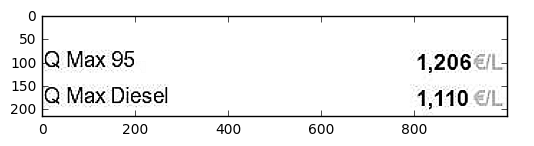

In [57]:
image = image_petrol.convert("L")
basewidth = 1000
wpercent = float(basewidth) / float(image.size[0])
hsize = int((float(image.size[1]) * float(wpercent)))
image = image.resize((basewidth, hsize), Image.LIBIMAGEQUANT)  # Bicubic # LIBIMAGEQUANT
image = image.filter(ImageFilter.EDGE_ENHANCE_MORE)
imshow(np.asarray(image), 'gray') ;

In [33]:
tesserocr.image_to_text(image, lang="slv")

'Q Max 95 1,2065,»\nQ Max Diesel 1,110\n\n'

In [34]:
image.show()

''

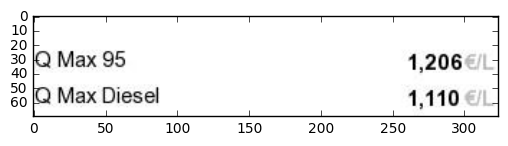

In [58]:
img = cv2.imread('../data-test/petrol.jpg',0)
o_image = image
img = cv2.medianBlur(img, 1)
imshow(img, 'gray')
;

In [9]:
 ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [10]:
 th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY,11,2)

In [11]:
th3

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

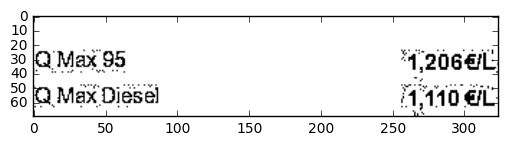

In [12]:
imshow(th3, 'gray')

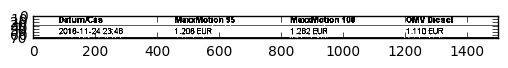

In [70]:
# Much promissing
image_path = "../data-test/omv-small.jpg"
image_path = "../data-test/petrol.jpg"
image_path = "../data-test/omv.jpg"
img_x = cv2.imread(image_path)

basewidth = 1500
wpercent = float(basewidth) / float(img_x.shape[1])
hsize = int((float(img_x.shape[0]) * float(wpercent)))

img_x = cv2.resize(img_x, (basewidth, hsize)) # , fx=0.2, fy=0.2)
ocr_gray = cv2.cvtColor(img_x, cv2.COLOR_BGR2GRAY)
# Do Otsu binarization on the image:
ocr_otsu = cv2.threshold(ocr_gray, 0, 255, cv2.THRESH_OTSU)[1]
ocr_ready = Image.fromarray(ocr_otsu)
imshow(ocr_ready, 'gray')

In [73]:
api = PyTessBaseAPI(lang="slv", psm = 6)
api.SetImage(ocr_ready)
api.SetVariable("tessedit_char_whitelist", "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0987654321-.,:/()")
text = api.GetUTF8Text() # .encode("utf-8") # Encode as utf-8, otherwise would be ascii by python's default
print(text)

Datum/Cas MmMotiggg MaxxMotion 100 OMLDiesel
2016-11-24 22:48 1 .206 EUR 1 .ggUR 1 rlEUR




In [38]:
img = api.GetThresholdedImage()
img.show()

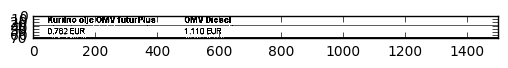

In [59]:
im=Image.open(image_path).convert('L')

basewidth = 1500
wpercent = float(basewidth) / float(im.size[0])
hsize = int((float(im.size[1]) * float(wpercent)))

im=cv2.resize(np.array(im), (basewidth, hsize), interpolation=cv2.INTER_CUBIC)
_, im = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
a = Image.fromarray(im)
imshow(a, 'gray')

In [60]:
api = PyTessBaseAPI(lang="slv")
api.SetImage(a)
api.SetVariable("tessedit_char_whitelist", "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0987654321-.,:/()")
text = api.GetUTF8Text() # Encode as utf-8, otherwise would be ascii by python's default
print(text)

Kurilno olje OMV futurPlus OMV Diesel

 

0.782 EUR 1.110 EUR

 




In [55]:
a.show()

In [74]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst

